<a href="https://colab.research.google.com/github/randiijulian/Mobile-Price-Classification/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mobile Price Classification

In [ ]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
from google.colab import files
files.upload()
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d iabhishekofficial/mobile-price-classification
!ls

Saving kaggle.json to kaggle (1).json
mobile-price-classification.zip: Skipping, found more recently modified local copy (use --force to force download)
'kaggle (1).json'   mobile-price-classification.zip   test.csv
 kaggle.json	    sample_data			      train.csv


In [ ]:
import zipfile
local_zip = '/content/mobile-price-classification.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#EDA

In [ ]:
iowa_file_path = '/content/train.csv'
home_data = pd.read_csv(iowa_file_path)
home_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
home_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
home_data.shape

(2000, 21)

In [ ]:
home_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
home_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
home_data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [ ]:
categorical_features=list()
numeric_features=list()
for column_name in home_data.columns:
    unique_values = len(home_data[column_name].unique())
    if unique_values<30:
      categorical_features.append(column_name)
    else:
      numeric_features.append(column_name)

In [ ]:
categorical_features

['blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'm_dep',
 'n_cores',
 'pc',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

In [ ]:
numeric_features

['battery_power', 'int_memory', 'mobile_wt', 'px_height', 'px_width', 'ram']

#EDA Visualization

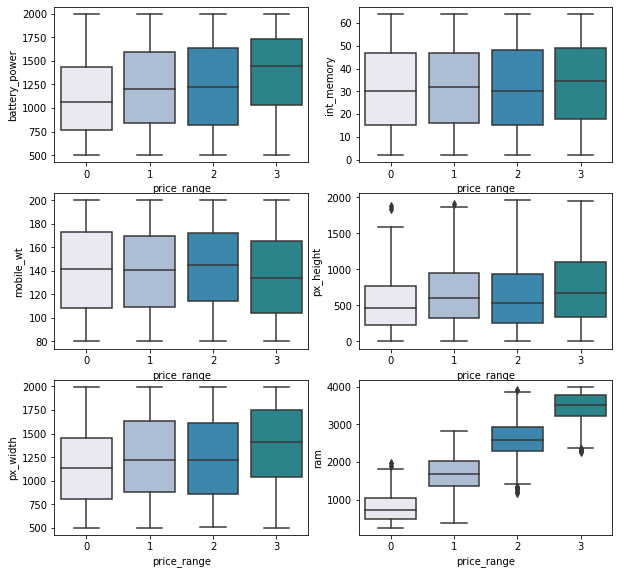

In [ ]:
#Analysis to check Outlier in Numeric Features
i = 1
plt.figure(figsize=(10,20))
for feature in numeric_features:
    plt.subplot(6,2,i)
    sns.set_palette("deep")
    sns.boxplot(x='price_range' , y=feature, data=home_data, palette=["#ece7f2", "#a6bddb", "#2b8cbe", "#1c9099"])
    i+=1

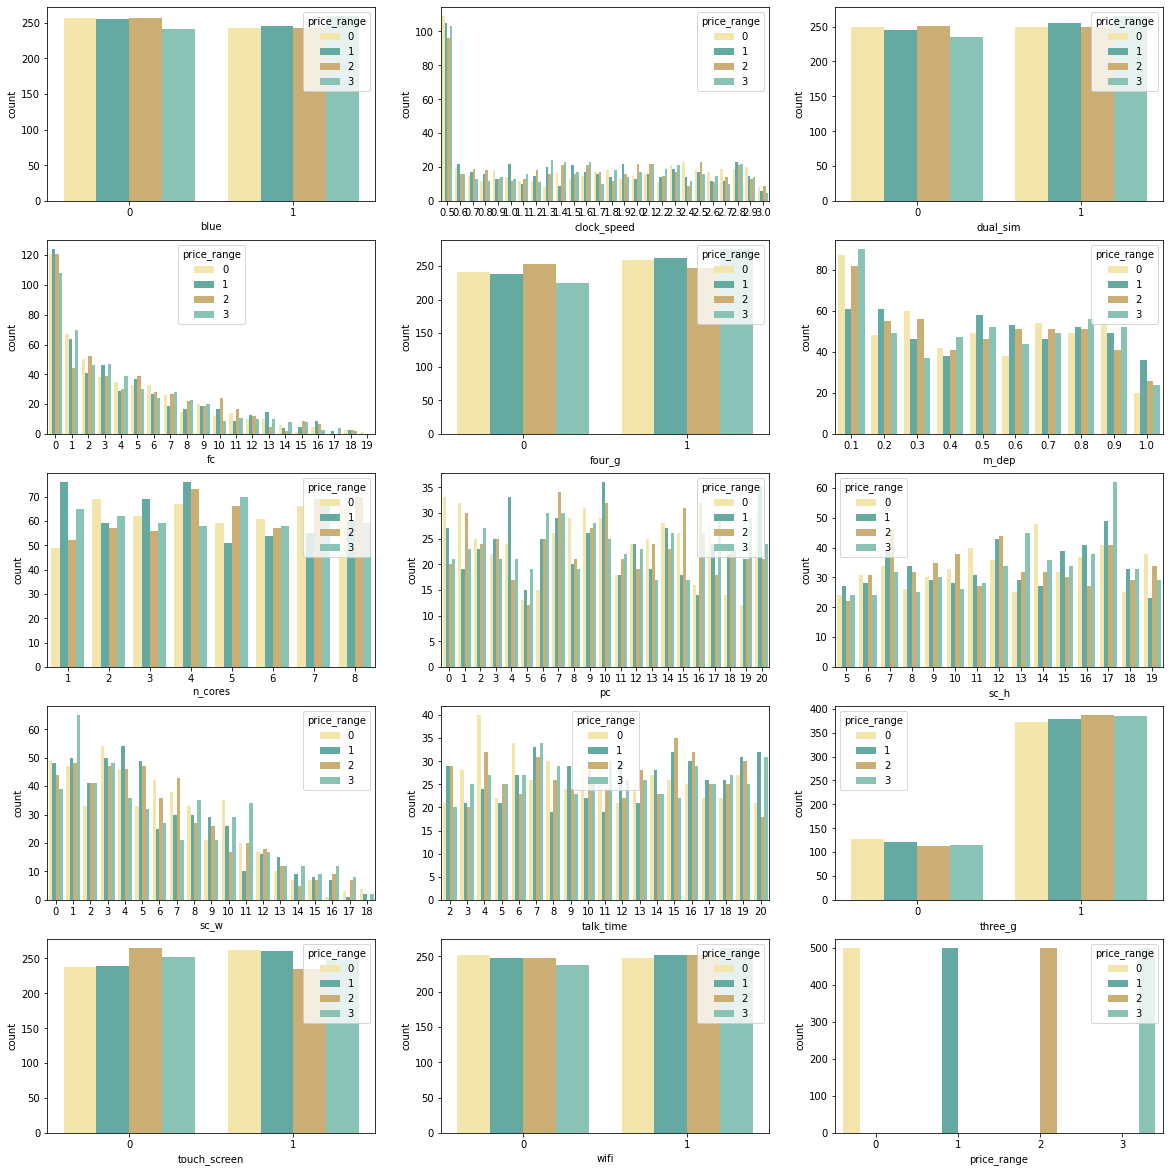

In [ ]:
# Analysis to check outlier in categorical values
i = 1
plt.figure(figsize = (20,25))
for feature in categorical_features:
    plt.subplot(6,3,i)
    sns.set_palette("deep")
    sns.countplot(x = feature , data = home_data,hue='price_range', palette=["#ffeda0", "#5ab4ac", "#d8b365", "#7fcdbb"])
    i +=1

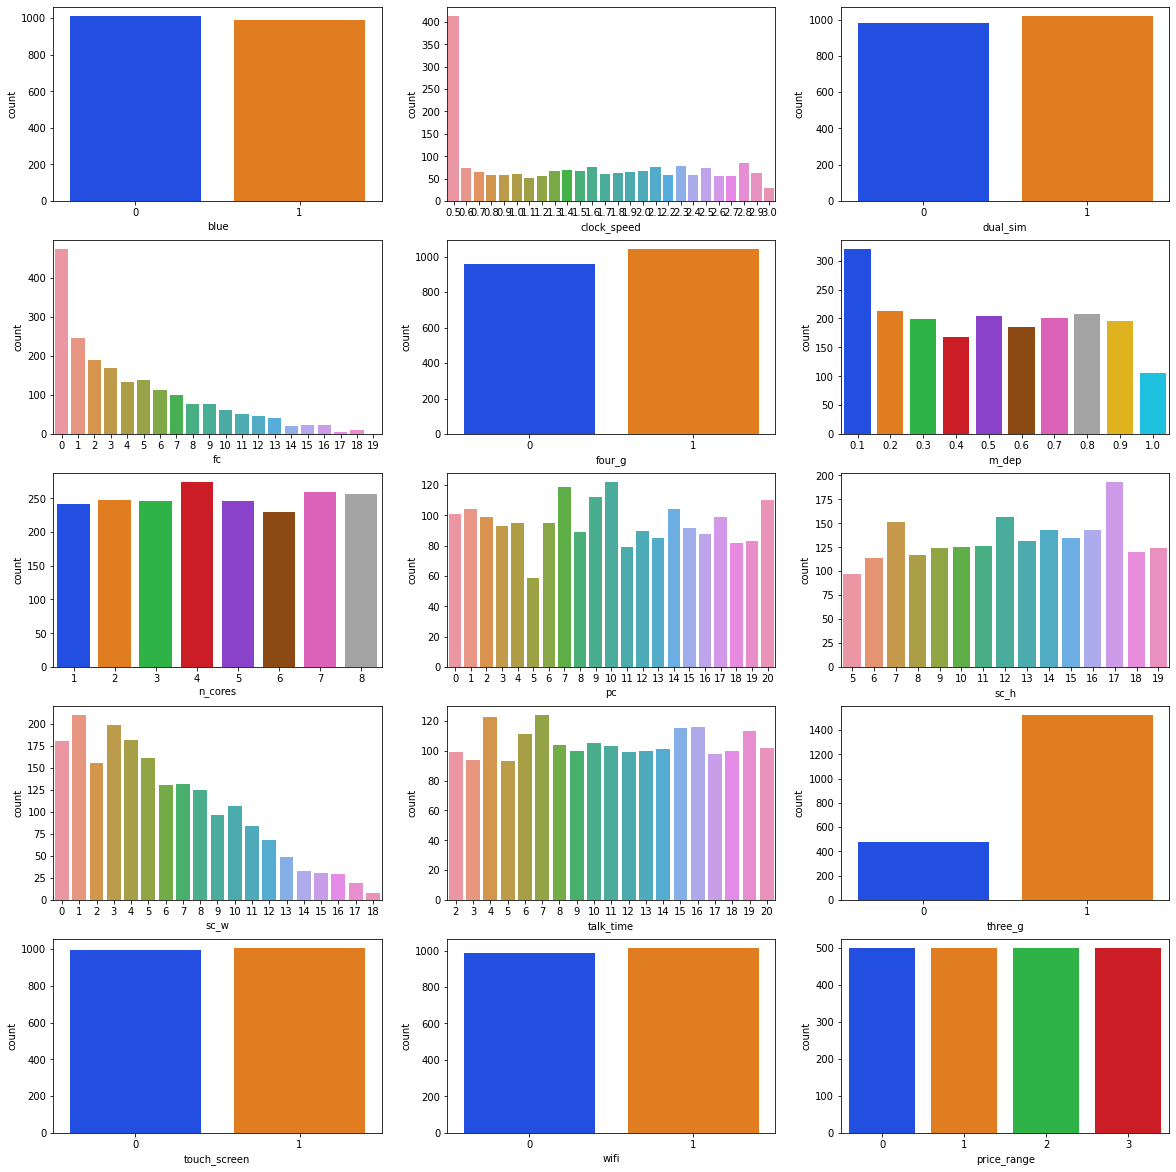

In [ ]:
i = 1
plt.figure(figsize = (20,25))
for feature in categorical_features:
    plt.subplot(6,3,i)
    sns.set_palette("bright")
    sns.countplot(x = feature , data = home_data)
    i +=1

Outlier pada ram dan px_height

Text(0.5, 1.0, 'Correlation ')

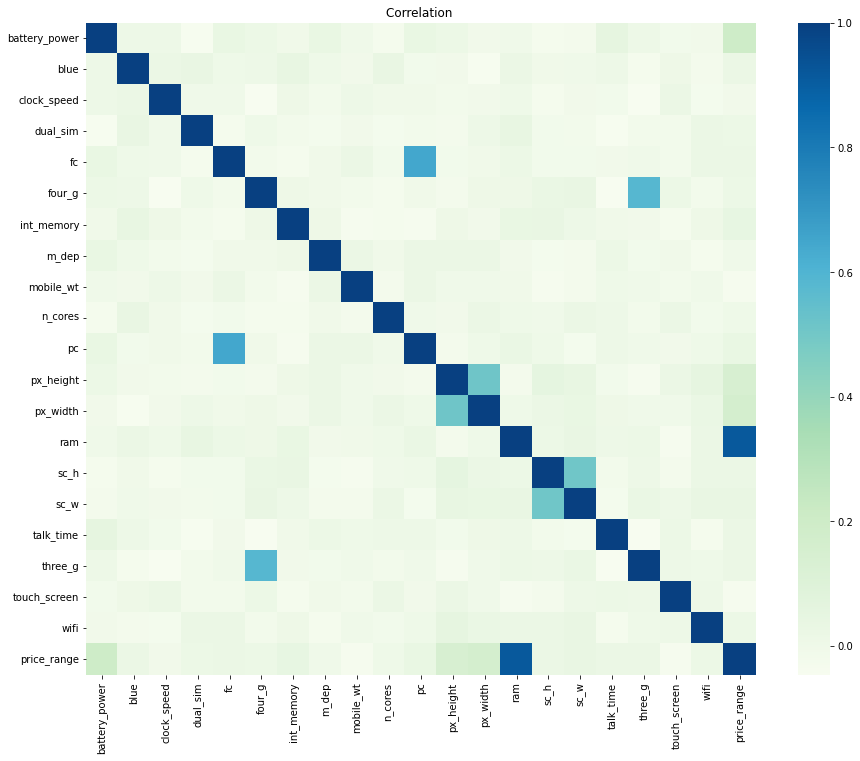

In [ ]:
# plt.figure(figsize=(18,12))
# sns.heatmap(
#     home_data.corr(),   
# )
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.title("Correlation Map", fontsize=20)
# plt.show()

corr=home_data.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='GnBu')
r.set_title("Correlation ")

price_range memiliki korelasi terhadap ram, px_width, px_height,dan battery power.

#Model

In [ ]:
#Splitting Dataset into Test and Train
from sklearn.model_selection import train_test_split

x = home_data.loc[:, home_data.columns != 'price_range']
y = home_data['price_range']
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)

In [ ]:
X_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
405,1454,1,0.5,1,1,0,34,0.7,83,4,3,250,1033,3419,7,5,5,1,1,0
1190,1092,1,0.5,1,10,0,11,0.5,167,3,14,468,571,737,14,4,11,0,1,0
1132,1524,1,1.8,1,0,0,10,0.6,174,4,1,154,550,2678,16,5,13,1,0,1
731,1807,1,2.1,0,2,0,49,0.8,125,1,10,337,1384,1906,17,13,13,0,1,1
1754,1086,1,1.7,1,0,1,43,0.2,111,6,1,56,1150,3285,11,5,17,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,955,0,0.5,1,4,0,43,0.9,143,5,8,1248,1511,1432,12,9,9,1,1,1
360,809,0,0.8,0,10,0,21,0.9,91,7,19,1453,1726,1274,18,7,3,0,0,0
1810,594,1,2.6,0,1,0,27,0.1,196,5,2,407,528,708,17,5,17,0,1,1
1743,1673,1,1.6,0,2,0,42,0.5,182,5,6,214,679,3094,12,4,20,0,0,0


In [ ]:
X_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
582,1232,0,2.9,1,1,1,24,0.3,169,5,17,361,809,1257,16,10,16,1,0,0
159,1840,0,0.5,1,12,0,34,0.7,142,1,16,311,1545,1078,8,0,10,0,0,0
1827,1692,0,2.1,0,4,1,2,0.9,106,1,17,1899,1904,3779,9,3,7,1,1,1
318,508,0,0.8,0,7,1,42,0.3,94,1,8,39,557,663,13,12,7,1,0,0
708,977,1,2.8,1,2,0,35,0.6,165,2,15,1502,1862,3714,19,3,10,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,1224,1,1.6,0,9,0,33,1.0,157,1,18,522,563,3796,10,5,13,1,1,0
1216,1158,0,0.7,1,1,1,29,0.7,123,2,20,311,1796,1542,17,9,15,1,0,1
1653,1190,0,2.0,1,0,0,40,0.2,93,5,1,1399,1646,3610,13,7,9,0,0,1
559,1191,0,2.4,1,2,0,13,0.9,169,1,7,179,1813,1028,14,6,8,1,1,1


### Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB()

In [ ]:
print("train accuracy:",GNB.score(X_train,y_train))
print("test accuracy:",GNB.score(X_test,y_test))

train accuracy: 0.81625
test accuracy: 0.835


### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
print("train accuracy:",rfc.score(X_train,y_train))
print("test accuracy:",rfc.score(X_test,y_test))

train accuracy: 1.0
test accuracy: 0.8675


### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
print("train accuracy:",dtree.score(X_train,y_train))
print("test accuracy:",dtree.score(X_test,y_test))

train accuracy: 1.0
test accuracy: 0.8375


Random Forest Classifier memiliki akurasi terbaik.

#Evaluation

In [ ]:
from sklearn.metrics import accuracy_score

y_gnb = GNB.predict(X_test)
y_dtree = dtree.predict(X_test)
y_rfc = rfc.predict(X_test)

In [ ]:
print('Test accuracy with Naive Bayes : ', round(accuracy_score(y_test, y_gnb), 4))
print('Test accuracy with Random Forest :', round(accuracy_score(y_test, y_rfc), 4))
print('Test accuracy with Decision Tree :', round(accuracy_score(y_test, y_dtree), 4))

Test accuracy with Naive Bayes :  0.835
Test accuracy with Random Forest : 0.8675
Test accuracy with Decision Tree : 0.8375


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, y_dtree))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92        95
           1       0.77      0.79      0.78        92
           2       0.77      0.73      0.75        99
           3       0.89      0.89      0.89       114

    accuracy                           0.84       400
   macro avg       0.83      0.84      0.83       400
weighted avg       0.84      0.84      0.84       400

